# EDA BaccLaureat Toamasina 2023

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bacc = pd.read_csv('baccalaureat.csv')
bacc.head()

,Numéro,Nom,Prénoms,Série,Mention,Centre,Etablissement
0,142 0000,ANDRIANANTENAINA,Rija Evarist,A1,Passable,TOAMASINA I,Lycée Foulpointe
1,142 0001,NALAHATRA,Tahina Francice,A1,Passable,TOAMASINA I,Lycée Foulpointe
2,142 0002,RAJOSOA,Eugene Whilly,A1,Passable,TOAMASINA I,Lycée Foulpointe
3,142 0003,RAMANOELINA,Zinolà,A1,Passable,TOAMASINA I,Lycée Foulpointe
4,142 0004,RANDRIAMANANTENA,Jacques Marco,A1,Passable,TOAMASINA I,Lycée Foulpointe


## 1 - Analyse de forme

**1 - a) Target :**     Mention

In [ ]:
#On fait une copie de notre dataframe
df = bacc.copy()
df['Mention']

0          Passable
1          Passable
2          Passable
3          Passable
4          Passable
            ...    
19874      Passable
19875    Assez bien
19876      Passable
19877      Passable
19878      Passable
Name: Mention, Length: 19879, dtype: object

**1 - b) Lignes, colonne :** 19879 lignes , 7 colonnes

In [ ]:
df.shape

(19879, 7)

**1 - c) Types de variables  :**
- Nos variables sont tous de types 'object'

In [ ]:
df.dtypes

Numéro           object
Nom              object
Prénoms          object
Série            object
Mention          object
Centre           object
Etablissement    object
dtype: object

**1 - d) Analyse des valeurs manquante :**
- Seul la variables colonnes présente des valeurs manquantes avec une taux de 3.5% qui n'est pas significatives pour nos données

In [ ]:
df.isna().sum() / df.shape[0]

Numéro           0.000000
Nom              0.000000
Prénoms          0.035615
Série            0.000000
Mention          0.000000
Centre           0.000000
Etablissement    0.000000
dtype: float64

## 2 - Analyse de fond

**2 - a) Visualisation de la target :**

- Notre target est catégoriel, elle présente 4 valeurs possible : 'Passable', 'Assez bien', 'Bien', 'Très bien'
- Pourcentage de chaque valeur:
  - Passable : 81.17%
  - Assez bien : 17.18%
  - Bien : 1.56%
  - Trés bien : 0.07%

Mention
Passable      81.176115
Assez bien    17.183963
Bien           1.564465
Très bien      0.075457
Name: count, dtype: float64


<Axes: ylabel='count'>

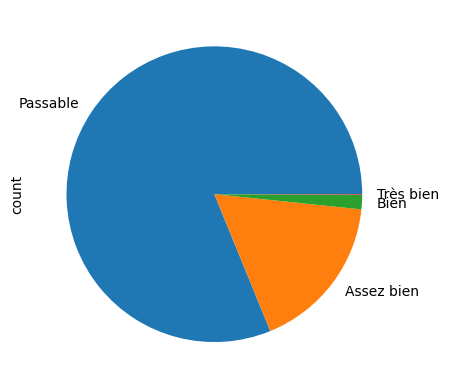

In [ ]:
#on extrait le target de notre donnée
target = df['Mention']

#Les valeur possibles dans notre target
target.unique()

#La répartition de ces valeur dans notre target
print(target.value_counts() / df.shape[0] * 100)
target.value_counts().plot.pie()

**2 - b) Compréhension des différents features :**

- Les variables utiles sont : 'Série', 'Centre' et 'Etablissement'
- Nos variables sont tous catégoriel et présente tous plusieurs valeurs

In [ ]:
#création d'un dataframe sans tarrget et suppréssion des colonnes non indispensable
variables = df.drop(['Nom', 'Prénoms', 'Numéro', 'Mention'], axis=1)

#Visualisation des valeurs dans nos variables
for col in variables:
    print(f"{col} : {df[col].unique()}")

Série : ['A1' 'A2' 'ACTC' 'C' 'CCBTP' 'CG' 'D' 'L' 'MEMA' 'OSE' 'PCBTP' 'S' 'SS'
 'TAG' 'TAMB' 'TEV' 'TFFI' 'TGC' 'TGI' 'TMA' 'TMEL' 'TOM' 'TPFM' 'TTER']
Centre : ['TOAMASINA I' 'AMBATONDRAZAKA' 'AMPARAFARAVOLA' 'MORARANO CHROME'
 'TANAMBE' 'ANDILAMENA' "ANOSIBE AN'ALA" 'ANTANAMBAO MANAMPOTSY'
 'VOHIBINANY (BRICKAVILLE)' 'FENERIVE-EST' 'VOHILENGO' 'MAHANORO'
 'MANANARA AVARATRA' 'MAROANTSETRA' 'MAROLAMBO' 'MORAMANGA'
 'AMBOASARY GARA' 'SAINTE MARIE' 'SOANIERANA IVONGO' 'VATOMANDRY'
 'VAVATENINA' 'IMERIMANDROSO']
Etablissement : ['Lycée Foulpointe' 'Lycée Ambodiriana'
 'Lycée Privé Catholique Stella Maris' 'Lycée Privé Saint Joseph de Cluny'
 'Lycée Privé Institution Nicolas Barré'
 "Lycée Privé Catholique Saint Jean d'Arc"
 'Lycée Privé FJKM Ziona Salazamay'
 'Lycée Privé Adventiste Mangarano (LAMA)'
 'Lycée Privé Adventiste Tamatave' 'Lycée Privé Adventiste Fanandrana'
 'Lycée Privé Thomas Bevans' 'Lycée Privé David Jones'
 'Lycée Privé Claire Deville' 'Lycée Privé Congregation Chinoi

- Les élèves en série 'A2' est présente le plus de réussite à l'examen contrairement à la série 'TAG' qui a une taux de réussite trés faibles
- Les centres de 'TOAMASINA 1' enregistre le plus de réussite durant l'examen alors que les centres de 'MAROLAMBO' enregistre une taux de réussite faibles   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'TOAMASINA I'),
  Text(1, 0, 'AMBATONDRAZAKA'),
  Text(2, 0, 'AMPARAFARAVOLA'),
  Text(3, 0, 'MORARANO CHROME'),
  Text(4, 0, 'TANAMBE'),
  Text(5, 0, 'ANDILAMENA'),
  Text(6, 0, "ANOSIBE AN'ALA"),
  Text(7, 0, 'ANTANAMBAO MANAMPOTSY'),
  Text(8, 0, 'VOHIBINANY (BRICKAVILLE)'),
  Text(9, 0, 'FENERIVE-EST'),
  Text(10, 0, 'VOHILENGO'),
  Text(11, 0, 'MAHANORO'),
  Text(12, 0, 'MANANARA AVARATRA'),
  Text(13, 0, 'MAROANTSETRA'),
  Text(14, 0, 'MAROLAMBO'),
  Text(15, 0, 'MORAMANGA'),
  Text(16, 0, 'AMBOASARY GARA'),
  Text(17, 0, 'SAINTE MARIE'),
  Text(18, 0, 'SOANIERANA IVONGO'),
  Text(19, 0, 'VATOMANDRY'),
  Text(20, 0, 'VAVATENINA'),
  Text(21, 0, 'IMERIMANDROSO')])

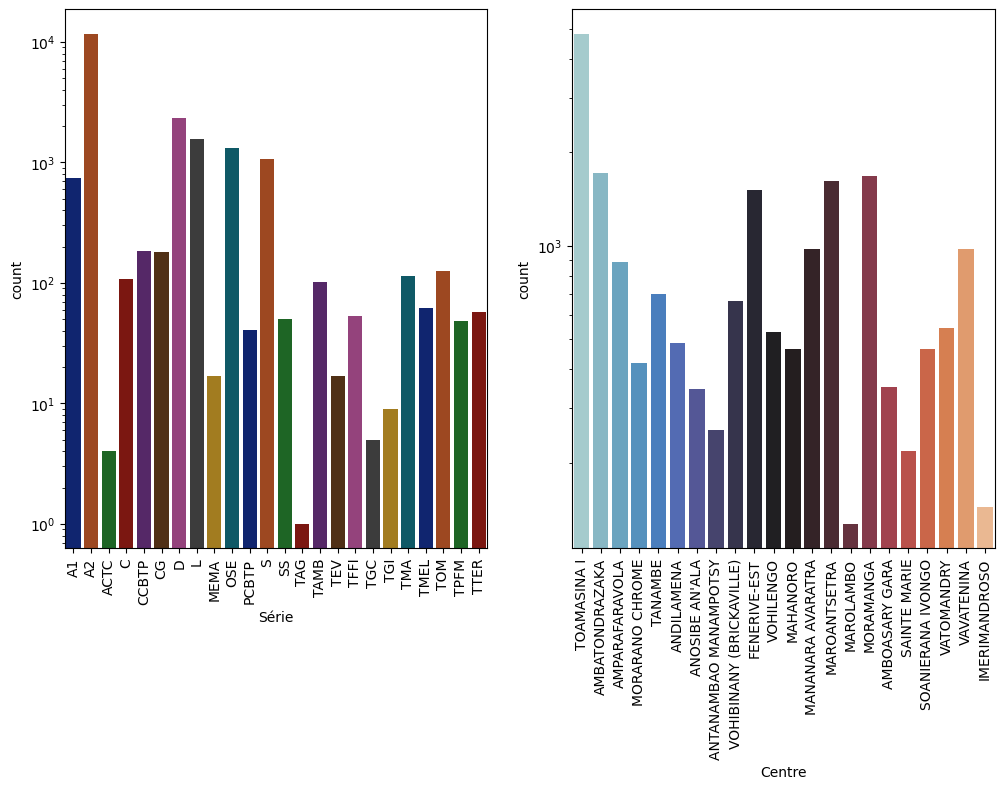

In [ ]:
#visualisation graphique
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
sns.countplot(x=variables['Série'], palette='dark')
plt.yscale('log')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.countplot(x=variables['Centre'], palette='icefire')
plt.yscale('log')
plt.xticks(rotation=90)

- On peut dire que le Lycée Privée Fitarikandro et le Lycée Jacques Rabemanajara obtient le plus de réussite par rapport aux autres établissement

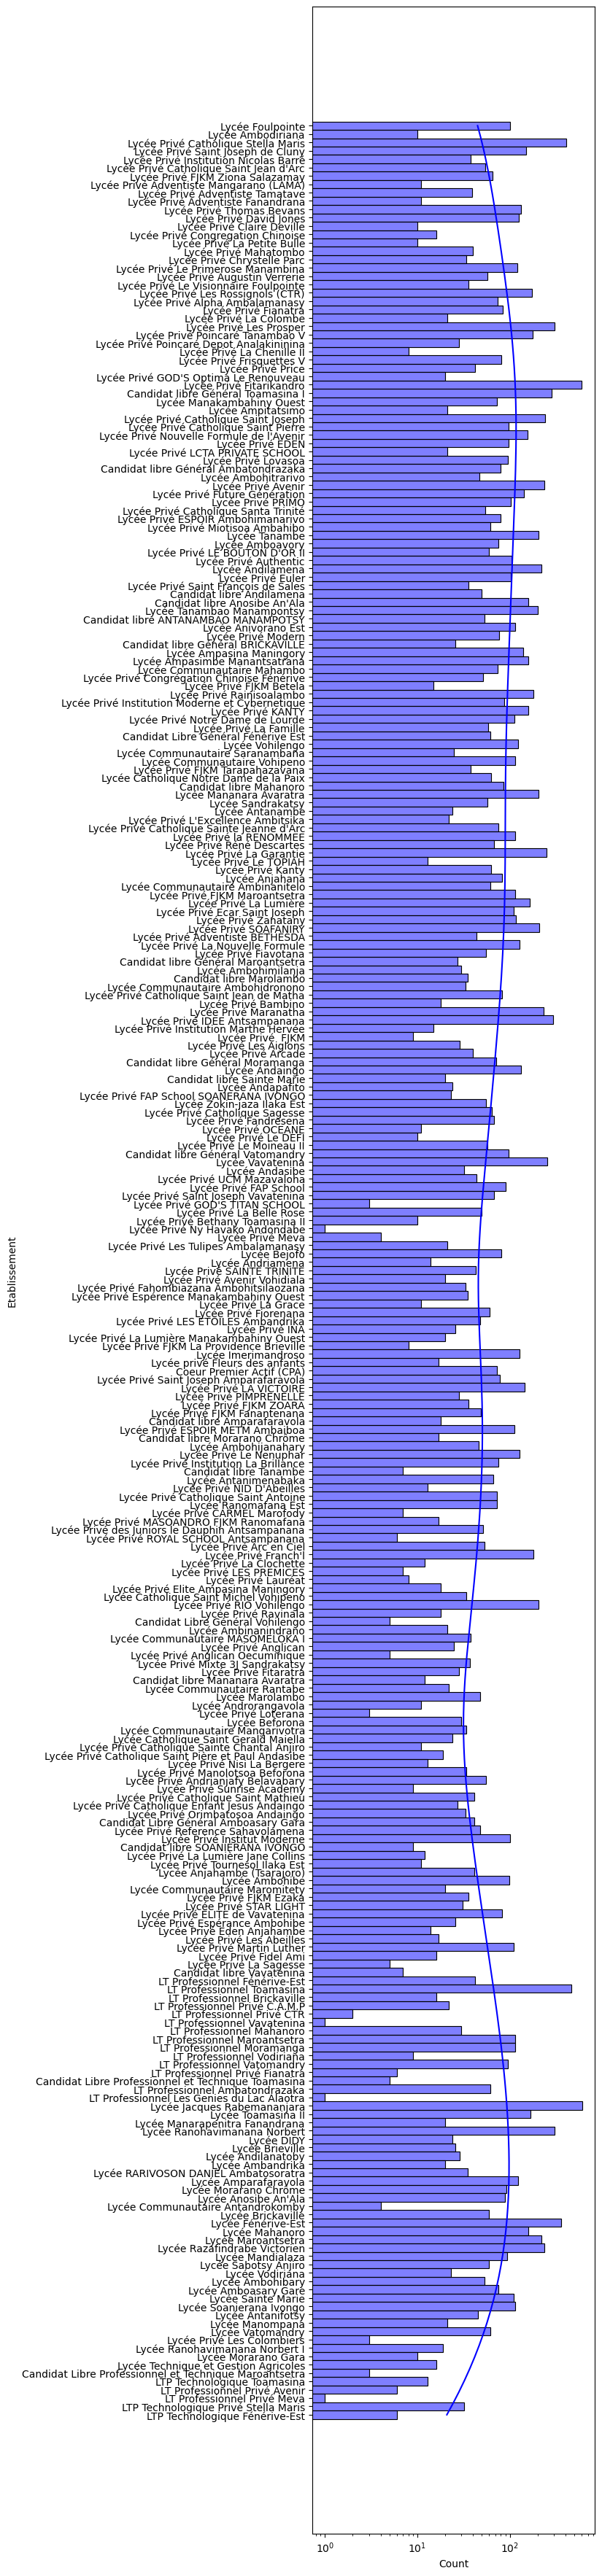

In [ ]:
#visualisation graphique
plt.figure(figsize=(5, 45))
sns.histplot(y=variables['Etablissement'], kde=True, color='blue')
plt.xscale('log')

In [ ]:
variables['Etablissement'].value_counts()

Etablissement
Lycée Jacques Rabemananjara                   605
Lycée Privé Fitarikandro                      595
LT Professionnel Toamasina                    461
Lycée Privé Catholique Stella Maris           409
Lycée Fénérive-Est                            363
                                             ... 
LT Professionnel Privé CTR                      2
LT Professionnel Privé Meva                     1
Lycée Privé Ny Havako Andondabe                 1
LT Professionnel Les Genies du Lac Alaotra      1
LT Professionnel Vavatenina                     1
Name: count, Length: 275, dtype: int64

**2 - c) Relation Target/variables :**

- Seul les série 'Scientifique' et 'Technique' présente des élèves qui ont réussi à obtenir des mentions Trés bien, pour le série 'TAG' tout les élèves ont obtenu une mention Bien
- Les centres de 'TOAMASINA 1', 'MORAMANGA' et 'VATOMANDRY' signale des élèves qui ont obténue la mention 'Trés bien'
- Les établissements Privée enregistre le plus de réussite durant l'examen
- Encore une fois, les établissements Privée présente le plus de mention Trés bien
- La mention passables est élevée pour tout les catégories d'établissement
- Aucun Candidat libre n'a eu le mention 'Trés bien" durant l'examen

c:\Users\prodigy-170\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([0, 1, 2, 3],
 [Text(0, 0, 'Passable'),
  Text(1, 0, 'Assez bien'),
  Text(2, 0, 'Bien'),
  Text(3, 0, 'Très bien')])

<Figure size 640x480 with 0 Axes>

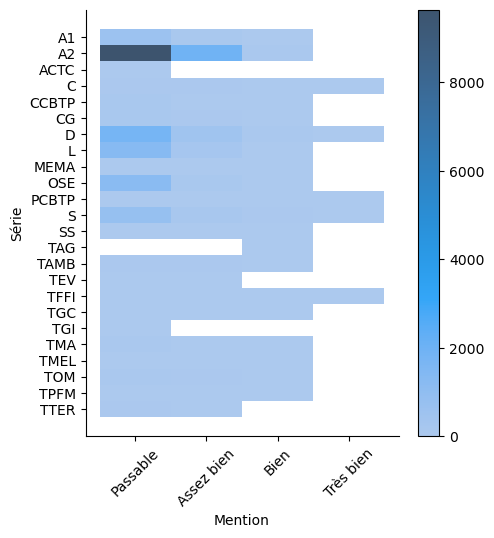

In [ ]:
plt.figure()
sns.displot(x=target, y=variables['Série'], data=df, cbar=True)
plt.xticks(rotation=45)

c:\Users\prodigy-170\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([0, 1, 2, 3],
 [Text(0, 0, 'Passable'),
  Text(1, 0, 'Assez bien'),
  Text(2, 0, 'Bien'),
  Text(3, 0, 'Très bien')])

<Figure size 640x480 with 0 Axes>

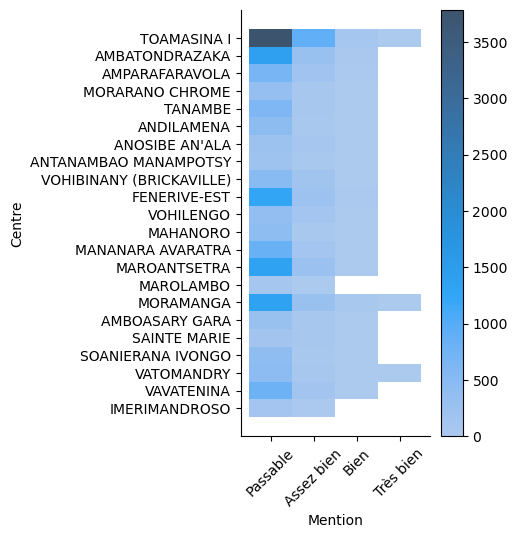

In [ ]:
plt.figure()
sns.displot(x=target, y=variables['Centre'], data=df, cbar=True)
plt.xticks(rotation=45)

In [ ]:
etablissement = variables['Etablissement']

#regroupement des établissement suivant leur status
for i in range(len(etablissement)):
    liste = etablissement[i].split(' ')

    if 'Privé' in liste:
        variables['status'][i] = 'Privé'
    elif ('LT' or 'LTP') in liste:
        variables['status'][i] = 'Technique'
    elif 'Libre' in liste:
        variables['status'][i] = 'Candidat libre'
    else :
        variables['status'][i] = 'Publique'

In [ ]:
variables['status'].value_counts()

status
Privé             10773
Publique           8042
Technique           948
Candidat libre      116
Name: count, dtype: int64

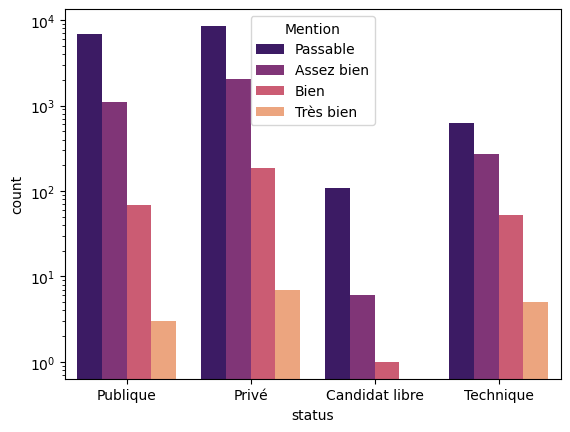

In [ ]:
plt.figure()
sns.countplot(x=variables['status'], hue=target, palette='magma')
plt.yscale('log')

# EDA Orange

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
orange = pd.read_csv('orange_mg.csv')
orange.head()

,titre,contenue,dataPublication,temps_publication
0,RALLYE,Un pilote malgache à suivre de près en France....,NaN,NaN
1,BETAFO,Betafo est devenu un passage obligatoire des t...,NaN,NaN
2,AUTOROUTE,La société civile demande aussi aux responsabl...,NaN,NaN
3,VANILLE,Compte tenu du poids prépondérant de la Vanill...,NaN,NaN
4,PAPE FRANCOIS,Le Pape François se rend au Monastère des Cart...,NaN,NaN


## 1 - Analyse de forme

In [ ]:
#copie de notre dataframe
df = orange.copy()

**1 - a) Target :** titre

In [ ]:
df['titre']


0                   RALLYE
1                   BETAFO
2                AUTOROUTE
3                  VANILLE
4            PAPE FRANCOIS
               ...        
93700    INDUSTRIALISATION
93701     QUALITE DE L'AIR
93702             PLF 2024
93703         TEMPERATURES
93704    DROIT DES ENFANTS
Name: titre, Length: 93705, dtype: object

**1 - b) Lignes, colonnes :** 93705 lignes, 4 colonnes

In [ ]:
df.shape

(93705, 4)

**1 - c) Types de variables :**

- On a trois (3) variables de types 'object' et une (1) variables de types 'float64'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93705 entries, 0 to 93704
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   titre              93705 non-null  object 
 1   contenue           93705 non-null  object 
 2   dataPublication    93667 non-null  float64
 3   temps_publication  93665 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.9+ MB


**1 - d) Analyse des valeurs manquante :**

- Les valeurs manquantes sont néglibales pour nos donnée

In [ ]:
df.isna().sum() / df.shape[0]

titre                0.000000
contenue             0.000000
dataPublication      0.000406
temps_publication    0.000427
dtype: float64

## 2 - Analyse de fond

In [ ]:
#suppression des colonnes non indispensables pour notre études
df = df.drop('dataPublication', axis=1)

In [ ]:
#suppression des lignes contenant des valeurs manquantes
df = df.dropna(axis=0)


**2 - a) Visualisation de notre target :**

- On constate qu'il existe des doublons dans notre target, il y a 30880 valeur possibles sur 93705 lignes

In [ ]:
target = df['titre']
print(len(target.unique()))

30880


**2 - b) Compréhension des variables :**

- Les valeur dans notre variables sont des texts brutes
- On moyenne, chaque contenu a :
    - 394 caractère éspace inclu
    - 66 mots
- On voit que pour certains contenue de l'échantillon, il y a des mots plus fréquent que certaines

In [ ]:
#création d'un dataframe sans la target
variables = df.drop('titre', axis=1)

variables.head()

,contenue,temps_publication
40,Alors que l'Inde se dirige vers une vaccinatio...,2011-11-29 21:00:00
41,La Commission électorale nationale et indépend...,2011-11-29 21:00:00
42,Après la Révision Annuelle de la Liste Élector...,2012-11-29 21:00:00
43,La Croix-Rouge Malagasy participe à l'atelier ...,2012-11-29 21:00:00
44,4 observateurs philippins de l’ONU sont reten...,2013-05-08 05:15:00


In [ ]:
somme = 0

for value in variables['contenue']:
    somme += len(value)

moyenne = somme/variables.shape[0]
print(moyenne)

394.39908183419635


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prodigy-170\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prodigy-170\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


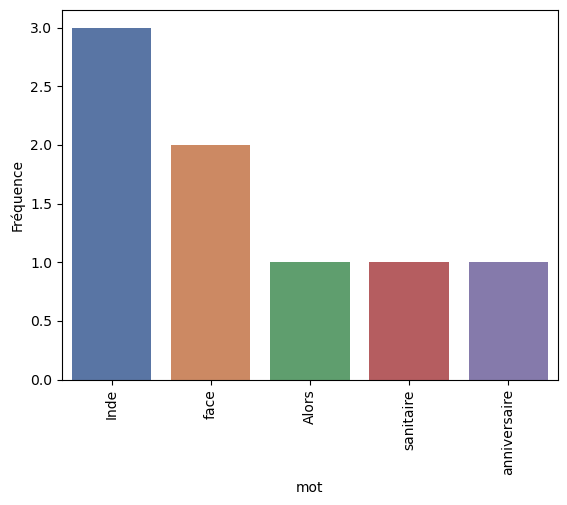

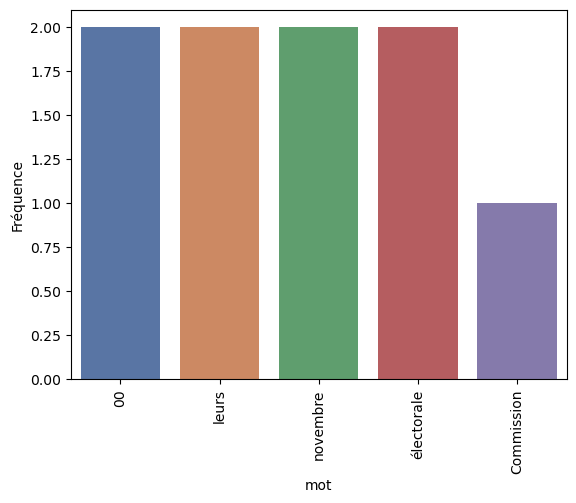

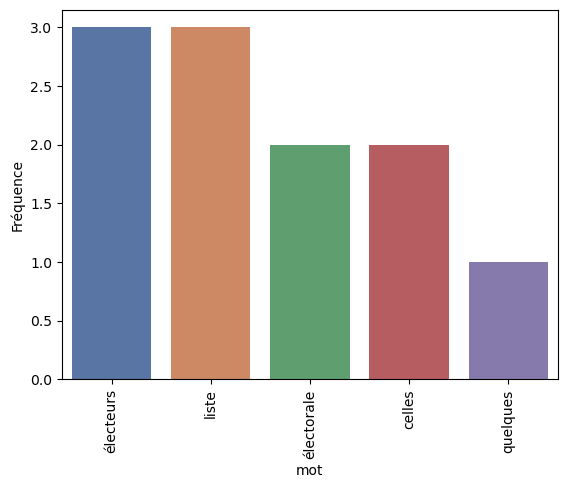

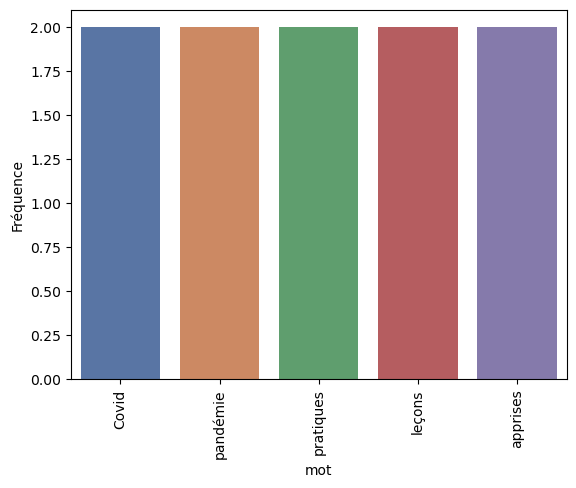

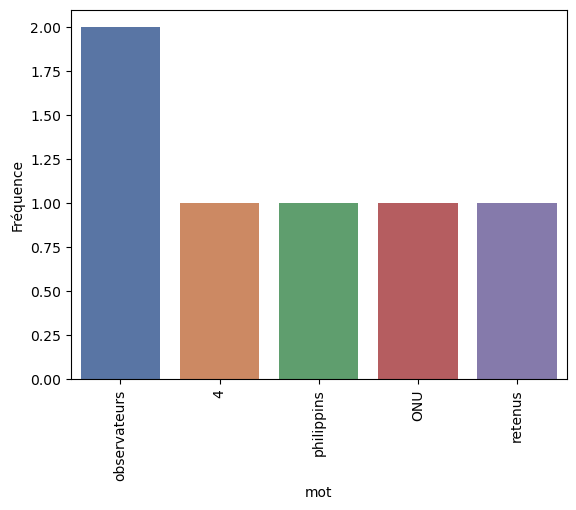

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')

for value in variables['contenue'][:5]:
    #tokenisation du text
    tokenizer = RegexpTokenizer(r'\w+')
    mots = tokenizer.tokenize(value)

    #suppréssion des stopwords
    stopword = set(stopwords.words('french'))
    mots = [mot for mot in mots if mot.lower() not in stopword]

    #fréquence des mots
    freq = FreqDist(mots)

    #création d'un dataframe
    donnee = {'Mot' : list(freq.keys()), 'Fréquence' : list(freq.values())}
    df = pd.DataFrame(donnee)

    #triage par fréquence
    df = df.sort_values(by='Fréquence', ascending=False)

    #illustration graphique
    plt.figure()
    sns.barplot(x='Mot', y='Fréquence', data=df.head(5), palette='deep')
    plt.xlabel('mot')
    plt.ylabel('Fréquence')
    plt.xticks(rotation=90)

**2 - c) Relation Target/variables :**

- On voit que les 5.6% du titre coincide avec la contenu

In [ ]:
contenue = variables['contenue']
somme = 0

for i in range(40, len(contenue)):
    #tokenisation du text
    tokenizer = RegexpTokenizer(r'\w+')
    mots = tokenizer.tokenize(contenue[i])

    #suppréssion des stopwords
    stopword = set(stopwords.words('french'))
    mots = [mot for mot in mots if mot.lower() not in stopword]

    if target[i] in  mots:
        somme += 1
    else:
        continue

pourcentage = somme/contenue.shape[0]
print(pourcentage * 100)

5.64671969252122
